# Titanic Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

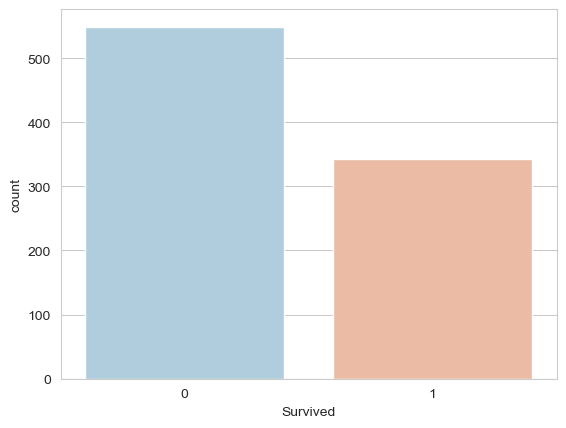

In [4]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',data = train , palette ='RdBu_r' )

<Axes: xlabel='Survived', ylabel='count'>

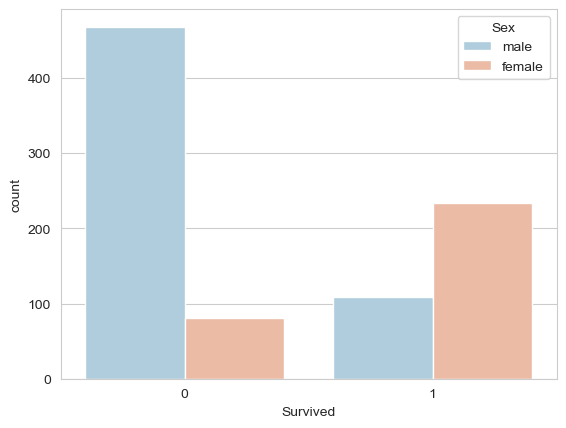

In [5]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue = 'Sex',data = train,palette = 'RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

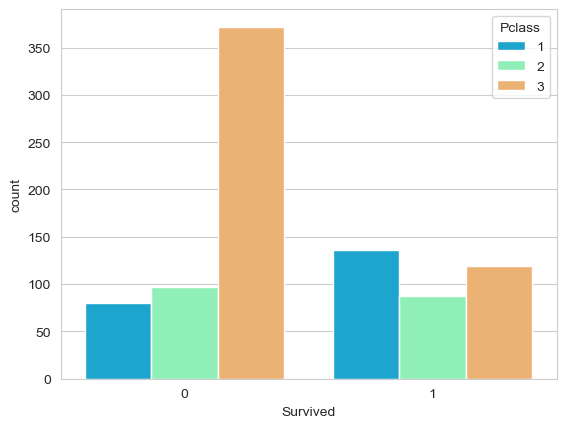

In [6]:
sns.set_style('whitegrid')
sns.countplot(x = "Survived",hue ="Pclass",data = train, palette = "rainbow")

<Axes: >

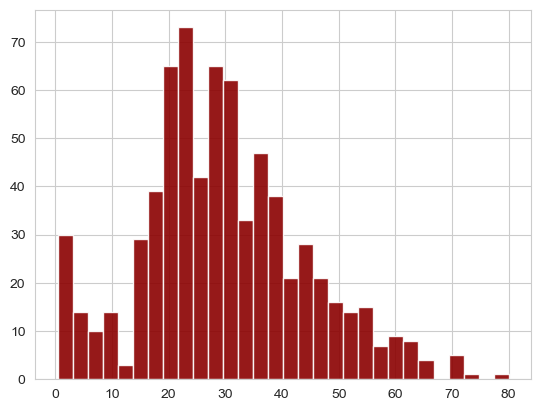

In [7]:
train["Age"].hist(bins=30,color='darkred',alpha = 0.9)

<Axes: xlabel='SibSp', ylabel='count'>

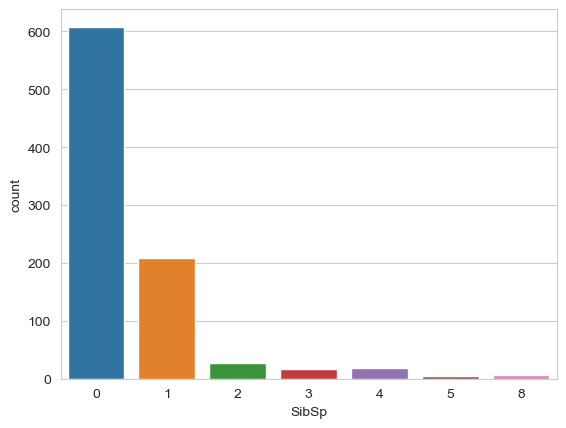

In [8]:

sns.countplot(x = 'SibSp',data = train)

<Axes: xlabel='Parch', ylabel='count'>

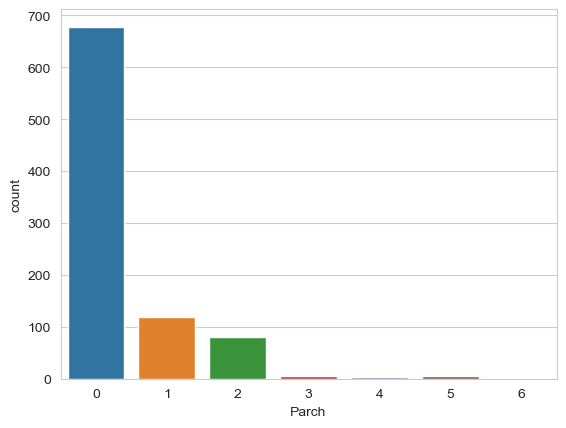

In [9]:
sns.countplot(x="Parch",data = train)

<Axes: xlabel='Pclass', ylabel='Age'>

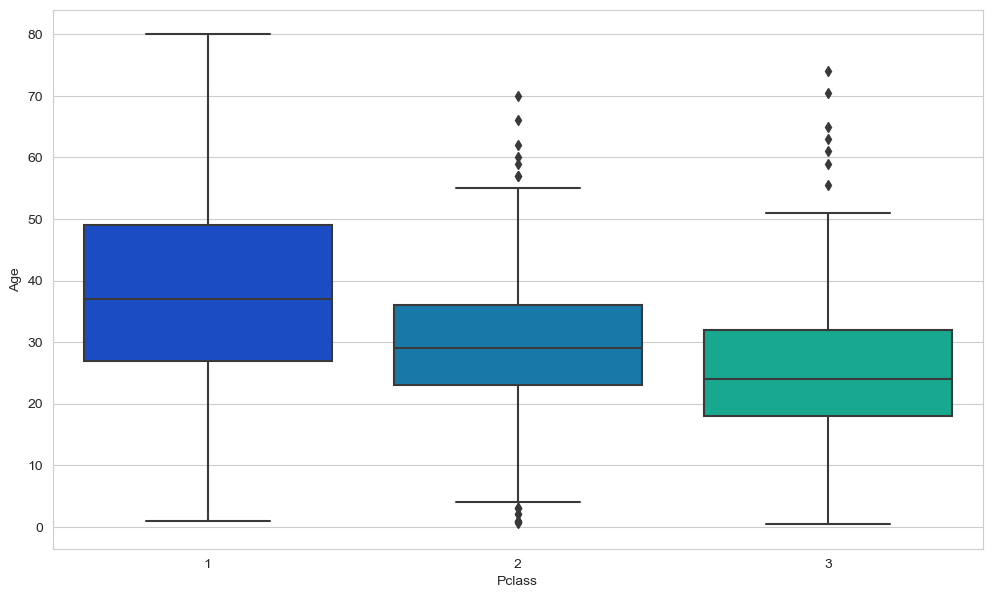

In [10]:
plt.figure(figsize = (12,7))
sns.boxplot(x = "Pclass",y = "Age",data = train , palette = "winter")

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [12]:
train["Age"] = train[["Age","Pclass"]].apply(impute_age,axis= 1)

In [13]:
train["Embarked"] = train["Embarked"].fillna("S")

<Axes: >

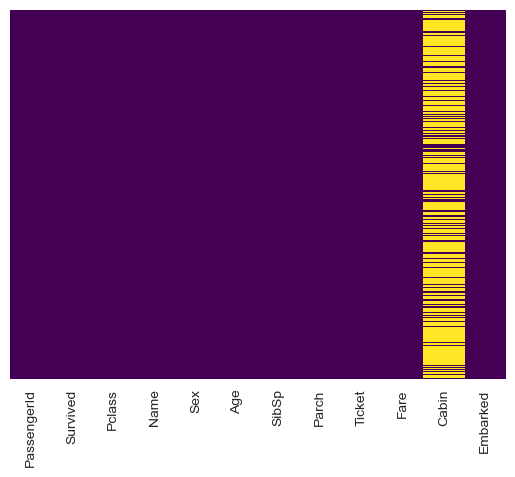

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar= False,cmap = "viridis")

In [15]:

train.drop("Cabin",axis = 1,inplace = True)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:

train.dropna(inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [19]:
sex = pd.get_dummies(train['Sex'],drop_first = True)
embark = pd.get_dummies(train["Embarked"],drop_first = True)

In [20]:
train.drop(["Sex","Embarked","Name","Ticket"],axis = 1, inplace = True)

In [21]:

train = pd.concat([train,sex,embark],axis = 1)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(train.drop(['Survived'],axis = 1

SyntaxError: incomplete input (1326040595.py, line 1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)
X_test.head()

In [ ]:
predictions

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)


In [ ]:
dt_pred = dt_model.predict(X_test)
print(confusion_matrix(y_test,dt_pred))


In [ ]:
print(classification_report(y_test,dt_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X_train,y_train)

In [ ]:

rf_pre = rf.predict(X_test)

In [ ]:

print(confusion_matrix(y_test,rf_pre))

In [ ]:
print(classification_report(y_test,rf_pre))